<a href="https://colab.research.google.com/github/jacqeinz/BreastCancerTumorEDA/blob/main/DataSetAnalysisSecond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 22.6 MB 18.6 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 71.4 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=763e8e046eca3ed66e72169cbcf86147a29822c24a9c16786729f8666f0699cb
  Stored in directory: /tmp/pip-ephem-wheel-ca

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/dataR2.csv')

In [ ]:
df.columns = df.columns.str.replace(' ', '')

In [ ]:
def impute_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()

   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,

       df.mean(),

       np.where(

           df < lower,

           df.mean(),

           df

           )

       )

   return df


In [ ]:
profile = ProfileReport(df)

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import seaborn as sns; sns.set()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-10-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


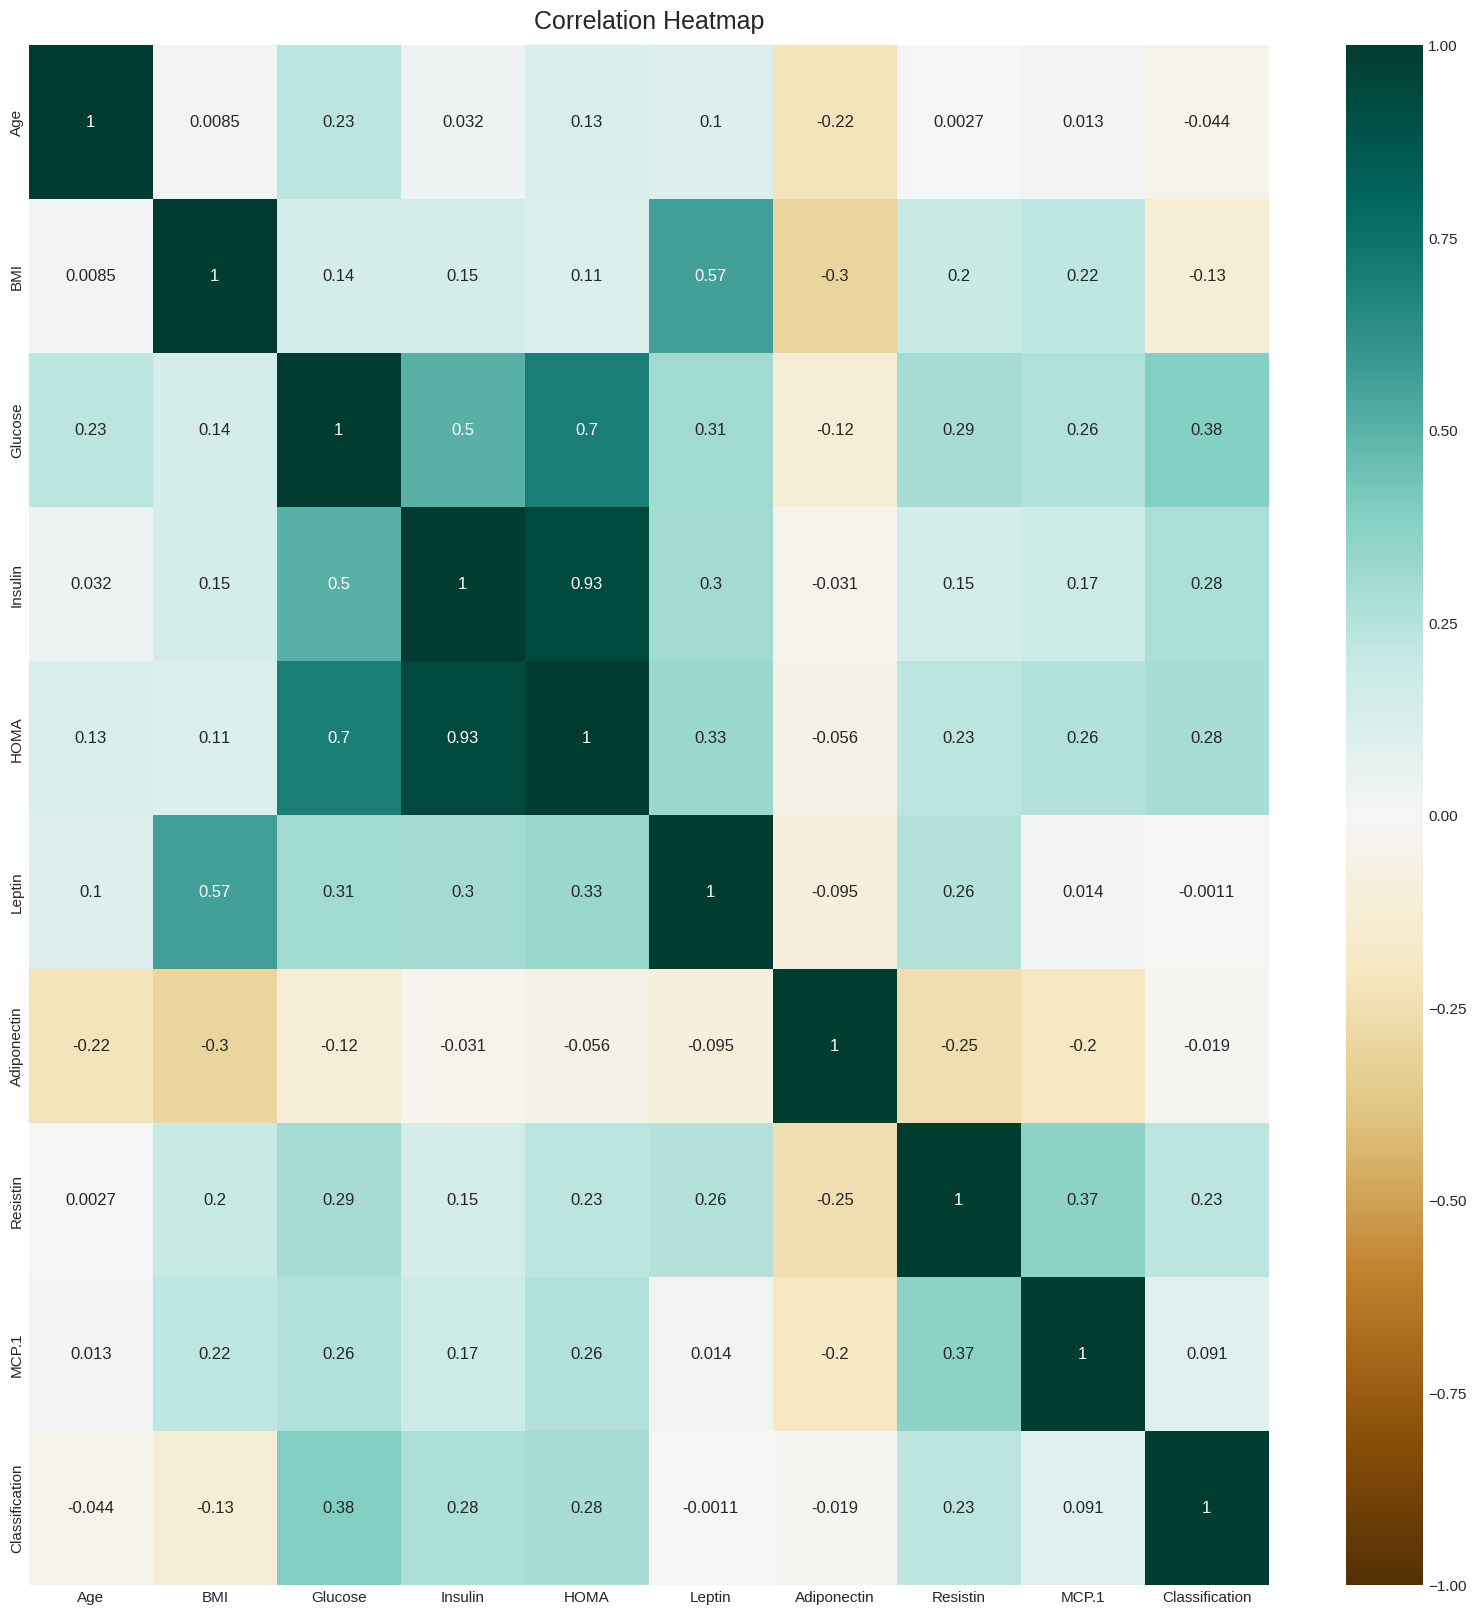

In [ ]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


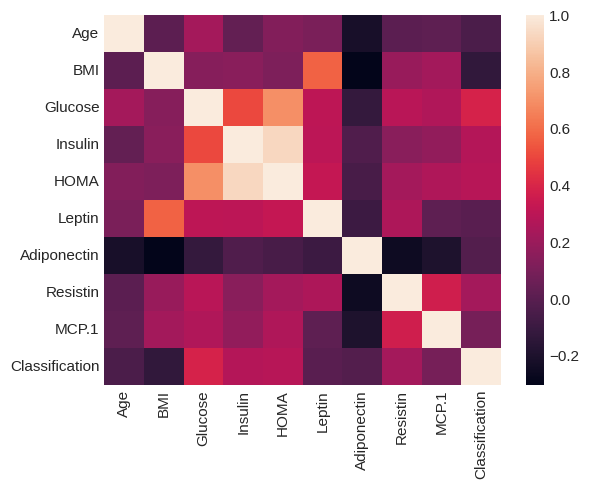

In [ ]:
sns.heatmap(df.corr());

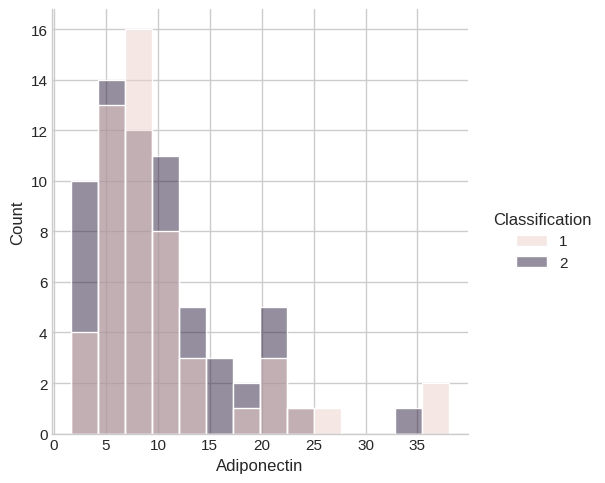

In [ ]:
sns.displot(df, x="Adiponectin", hue="Classification")

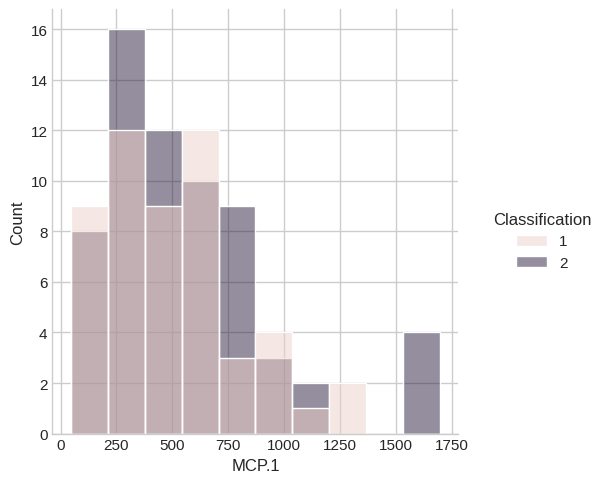

In [ ]:
sns.displot(df, x="MCP.1", hue="Classification")

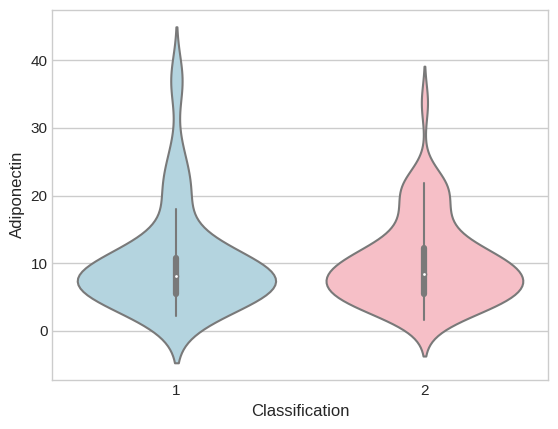

In [ ]:
sns.violinplot(x="Classification", y="Adiponectin", data=df,
               palette=["lightblue", "lightpink"]);

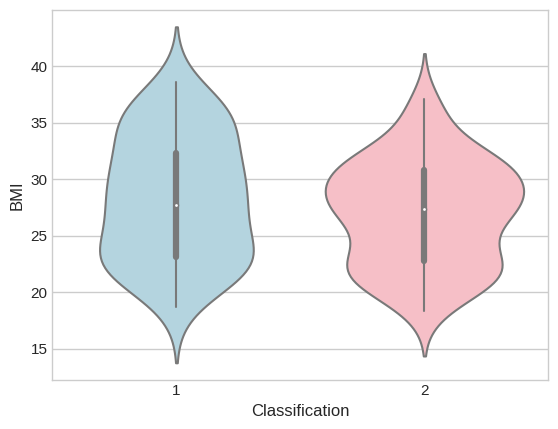

In [ ]:
sns.violinplot(x="Classification", y="BMI", data=df,
               palette=["lightblue", "lightpink"]);

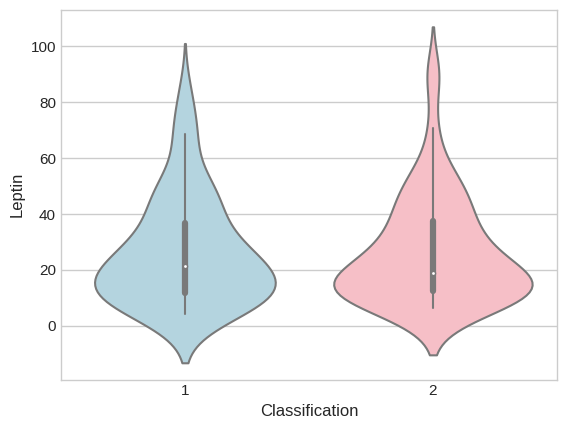

In [ ]:
sns.violinplot(x="Classification", y="Leptin", data=df,
               palette=["lightblue", "lightpink"]);

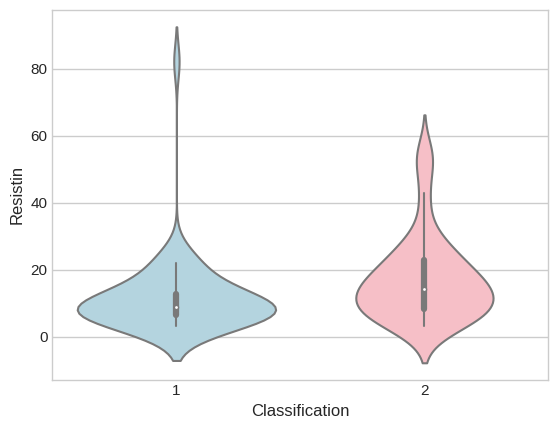

In [ ]:
sns.violinplot(x="Classification", y="Resistin", data=df,
               palette=["lightblue", "lightpink"]);

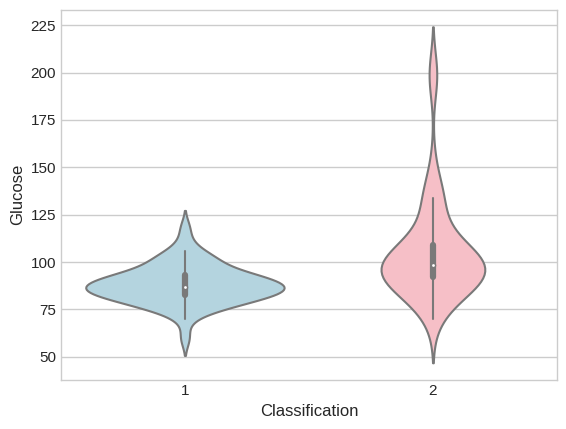

In [ ]:
sns.violinplot(x="Classification", y="Glucose", data=df,
               palette=["lightblue", "lightpink"]);


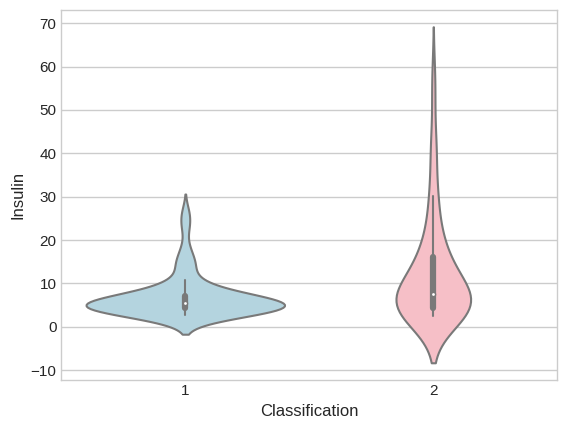

In [ ]:
sns.violinplot(x="Classification", y="Insulin", data=df,
               palette=["lightblue", "lightpink"]);


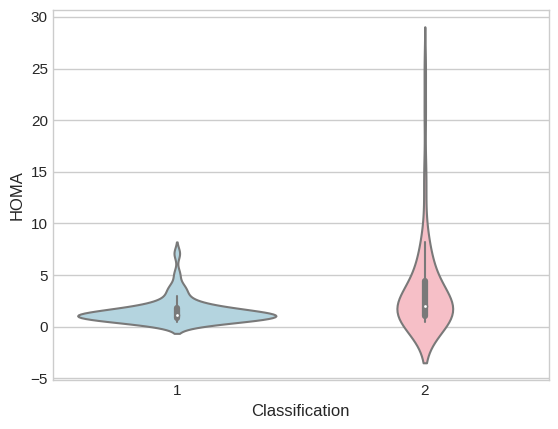

In [ ]:
sns.violinplot(x="Classification", y="HOMA", data=df,
               palette=["lightblue", "lightpink"]);


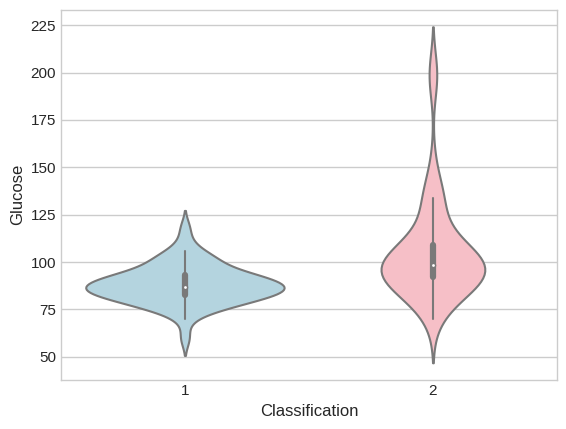

In [ ]:
sns.violinplot(x="Classification", y="Glucose", data=df,
               palette=["lightblue", "lightpink"]);


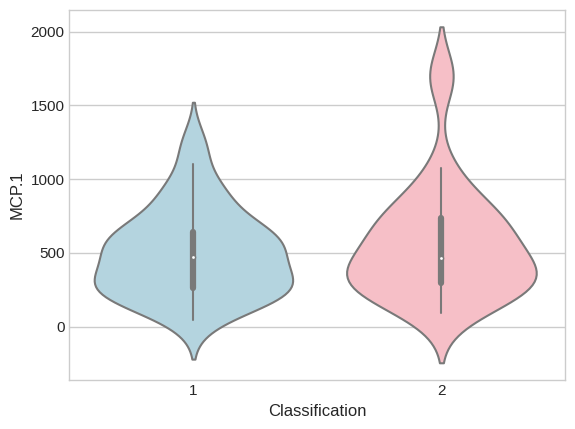

In [ ]:
sns.violinplot(x="Classification", y="MCP.1", data=df,
               palette=["lightblue", "lightpink"]);

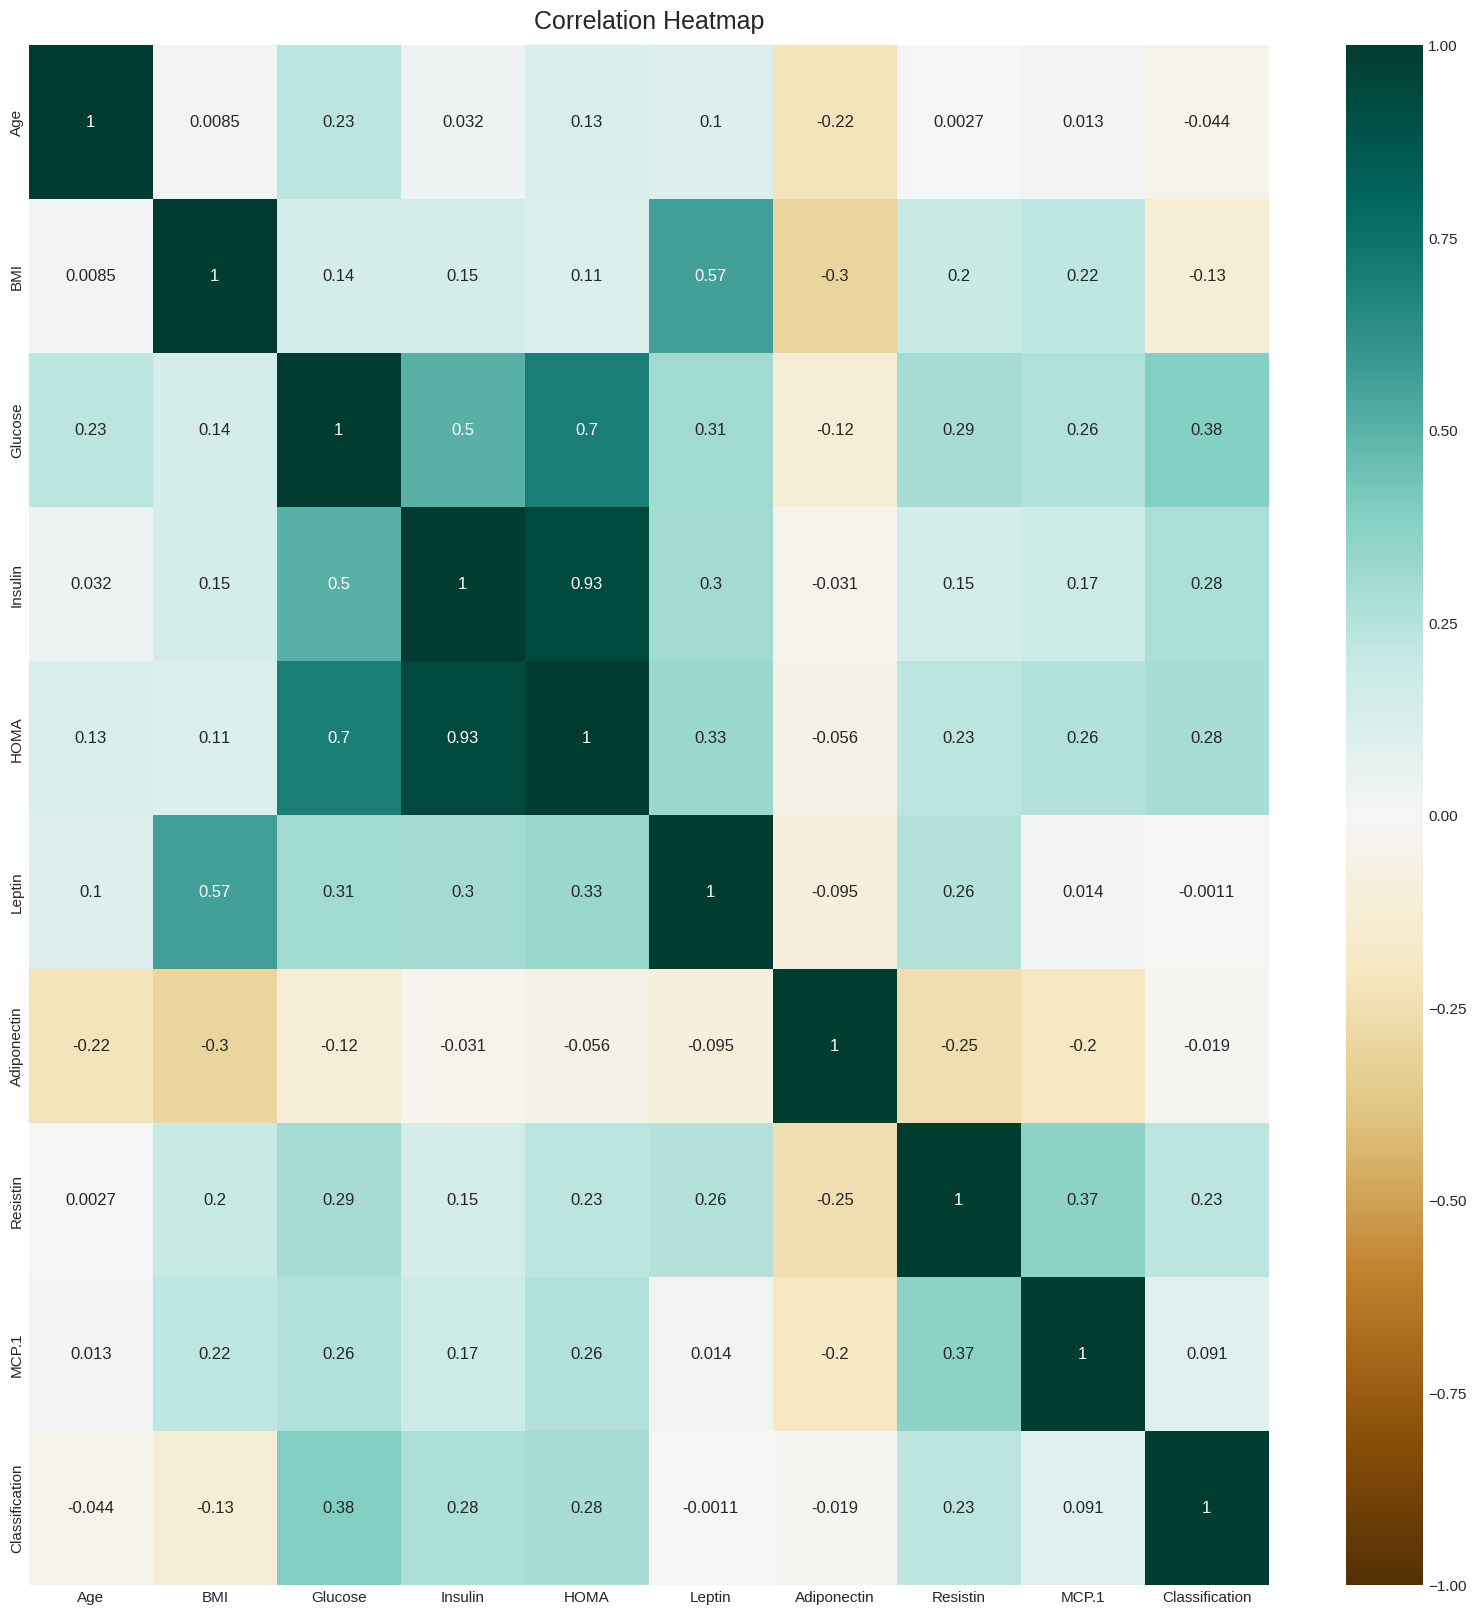

In [ ]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

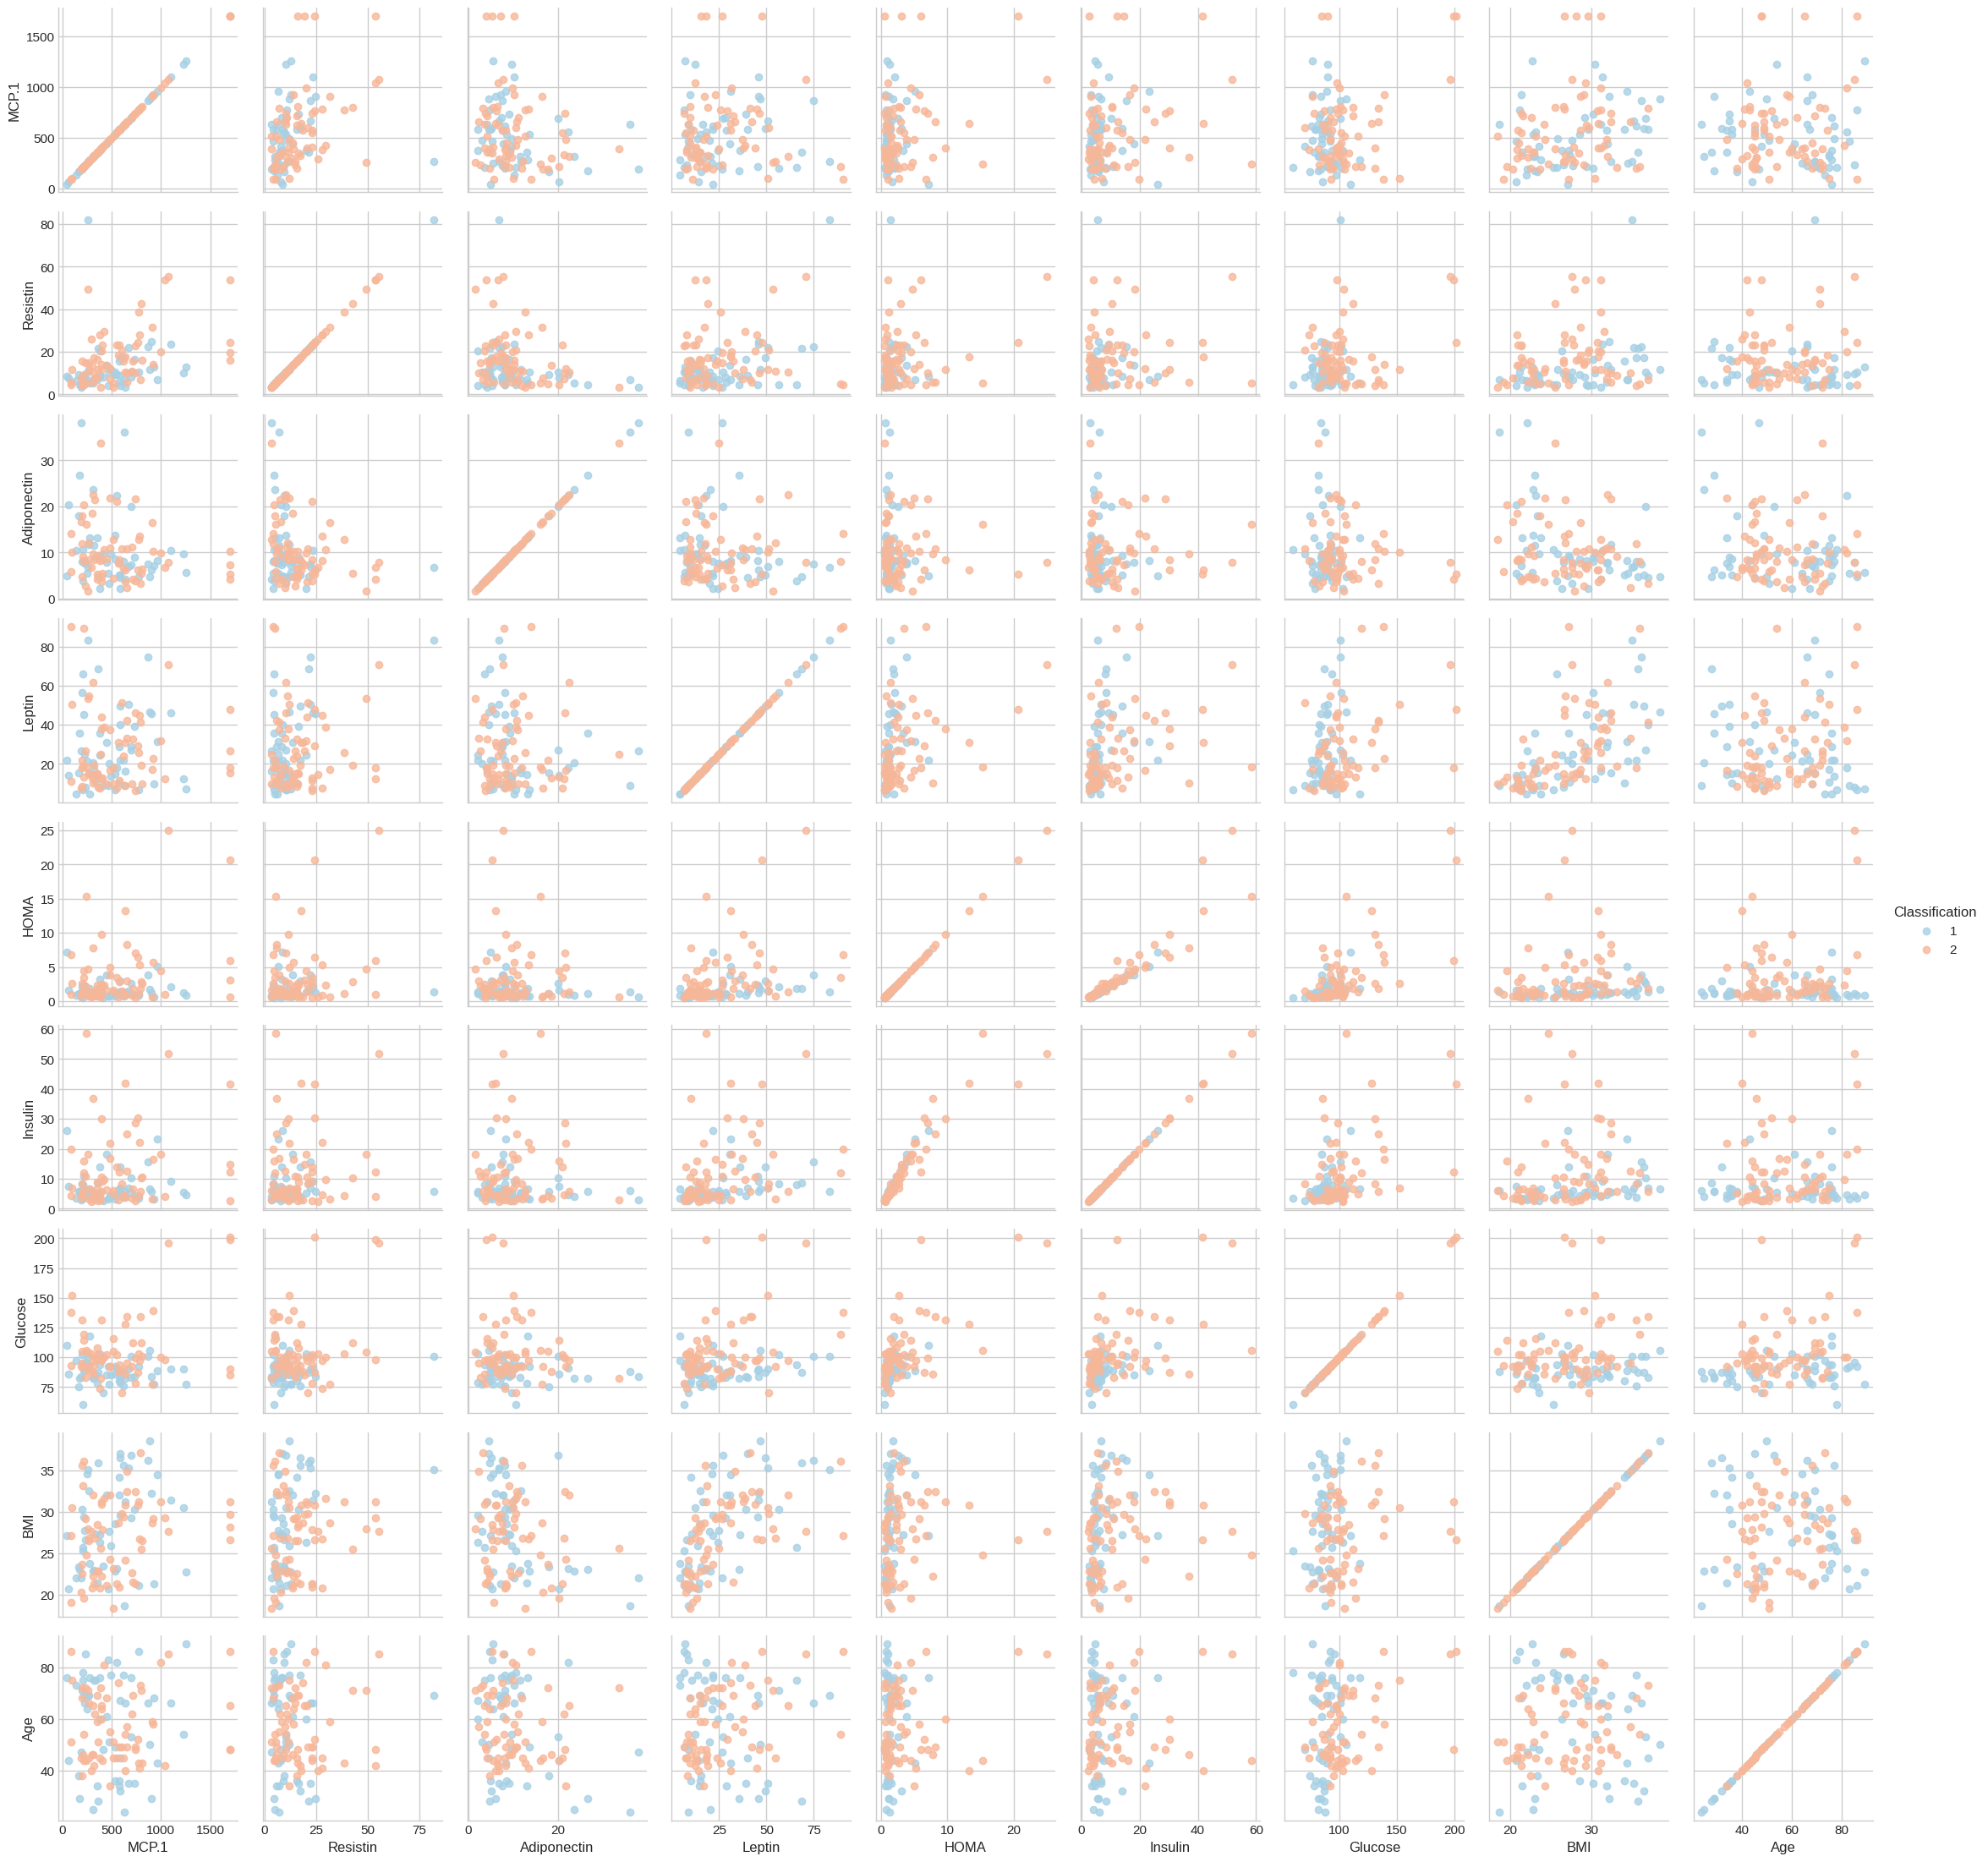

In [ ]:
g = sns.PairGrid(df, vars=['MCP.1', 'Resistin', 'Adiponectin', 'Leptin', 'HOMA', 'Insulin', 'Glucose', 'BMI', 'Age'],
                 hue='Classification', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [ ]:
df.describe()

Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  Classification  
count   116.000000  116.000000   116.000000      116.000000  
mean     10.180874   14.725966   534.647000        1.551724  
std       6.843341   12.390646   345.912663        0.499475  
min       1.656020    3.210000    45.843000        1.000000  
25%       5.474283    6.881763   269.978250        1.000000  
50%       8.352692   10.827740   471.322500        2.000000  
75%      11.815970   17.755207   700.085000        2.000000  
max      38.040000   82.100000  1698.440000        2.000000

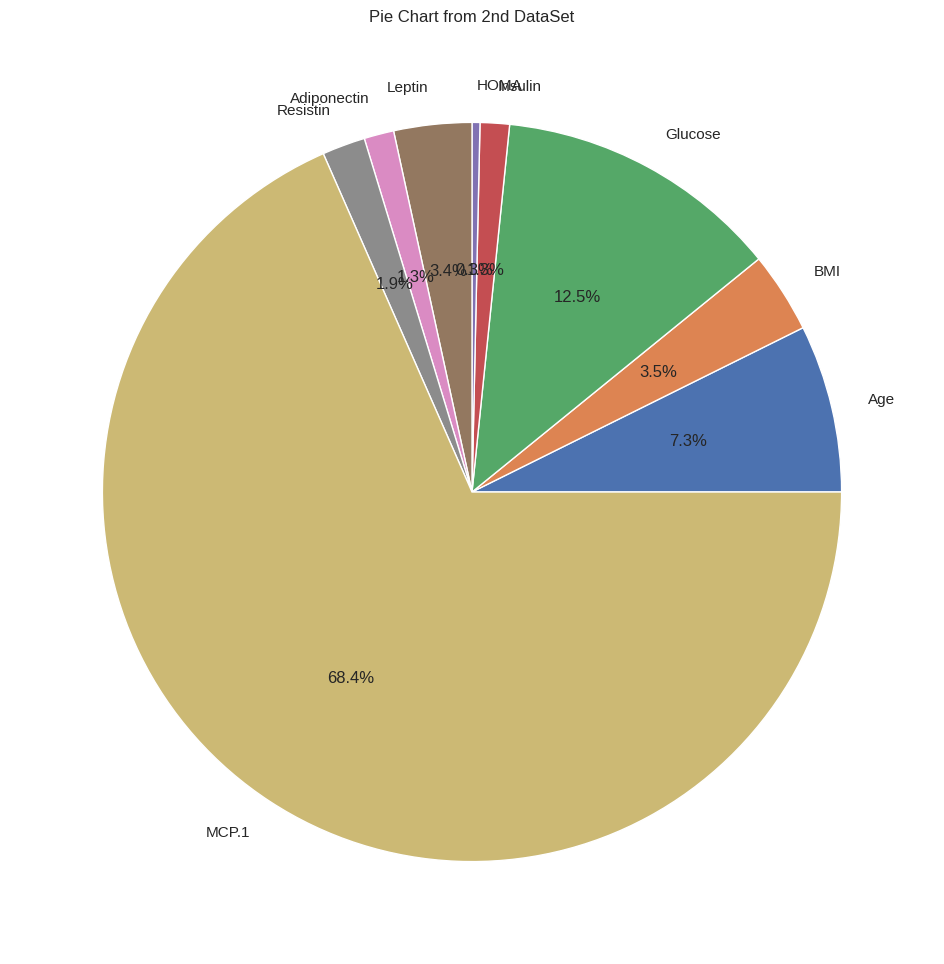

In [ ]:
data = df[["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP.1"]].values.tolist()

# combine the data into a single list
combined_data = [sum(x) for x in zip(*data)]

# create a pie chart
fig, ax = plt.subplots(figsize=(12, 12))
ax.pie(combined_data, labels=["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP.1"], autopct='%1.1f%%')
ax.set_title('Pie Chart from 2nd DataSet')

# show the plot
plt.show()

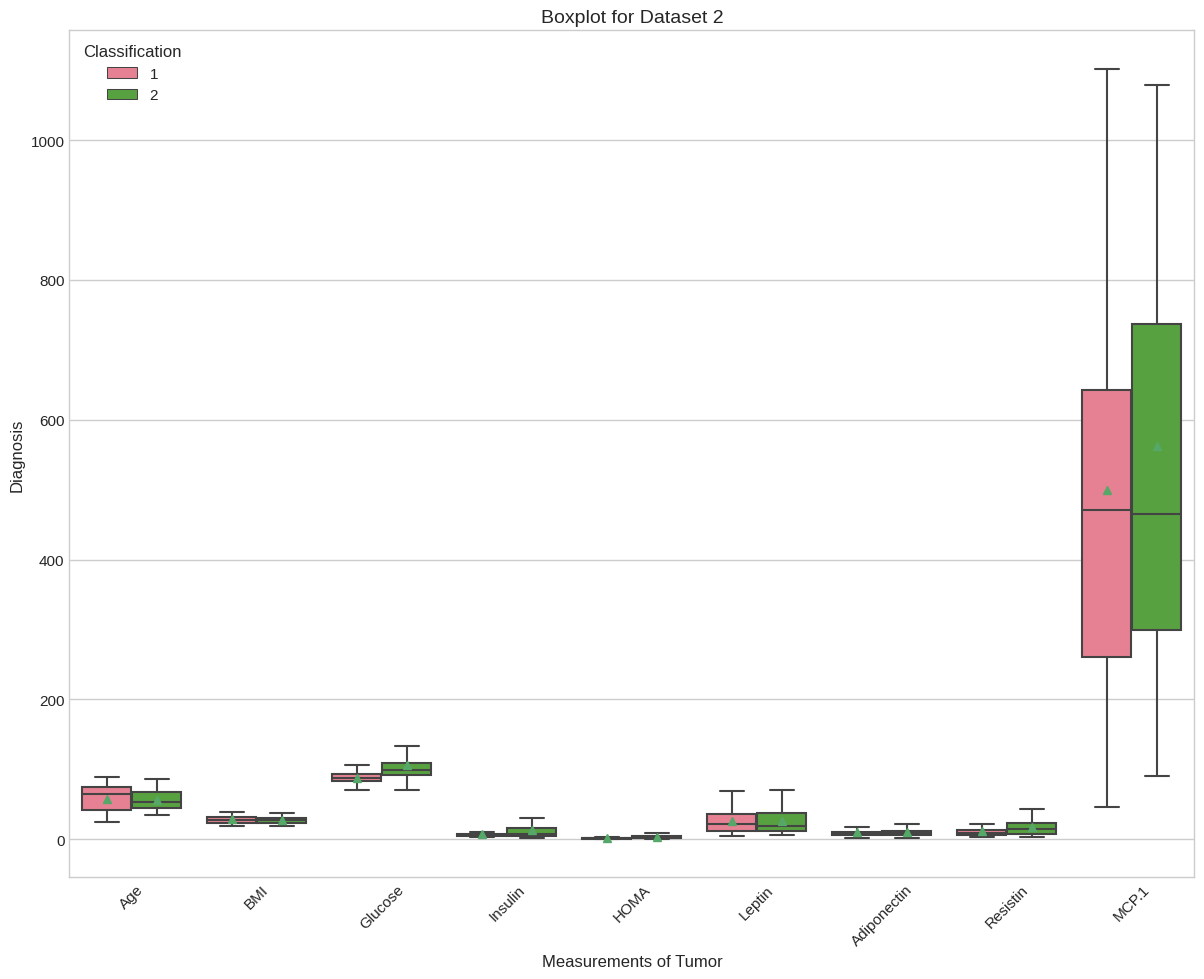

In [ ]:
plt.figure(figsize=(15, 11))
new_palette = sns.color_palette("husl", n_colors=3)
df_melted = pd.melt(df, id_vars=["Classification"], value_vars=["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP.1"],
var_name="group_column", value_name="value_column")

# Create grouped boxplot with means
sns.boxplot(x="group_column", y="value_column", data=df_melted, hue="Classification", orient="v", palette=new_palette, showmeans=True, showfliers=False)

plt.xlabel("Measurements of Tumor", fontsize=12)
plt.ylabel("Diagnosis", fontsize=12)
plt.title("Boxplot for Dataset 2", fontsize=14)
plt.xticks(rotation=45)
plt.subplots_adjust(left=0.15)

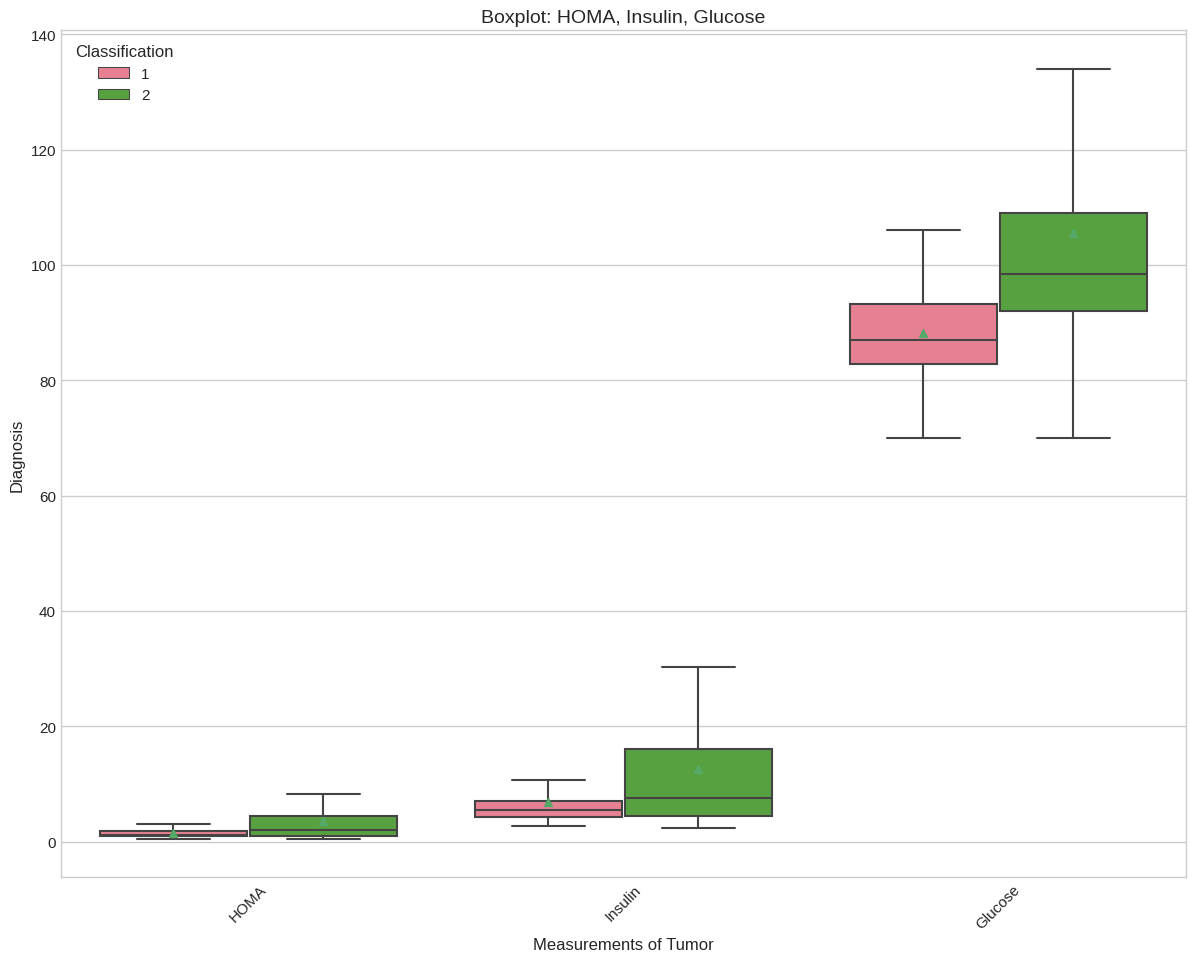

In [ ]:
plt.figure(figsize=(15, 11))
new_palette = sns.color_palette("husl", n_colors=3)
df_melted = pd.melt(df, id_vars=["Classification"], value_vars=["HOMA", "Insulin", "Glucose"],
var_name="group_column", value_name="value_column")

# Create grouped boxplot with means
sns.boxplot(x="group_column", y="value_column", data=df_melted, hue="Classification", orient="v", palette=new_palette, showmeans=True, showfliers=False)

plt.xlabel("Measurements of Tumor", fontsize=12)
plt.ylabel("Diagnosis", fontsize=12)
plt.title("Boxplot: HOMA, Insulin, Glucose", fontsize=14)
plt.xticks(rotation=45)
plt.subplots_adjust(left=0.15)

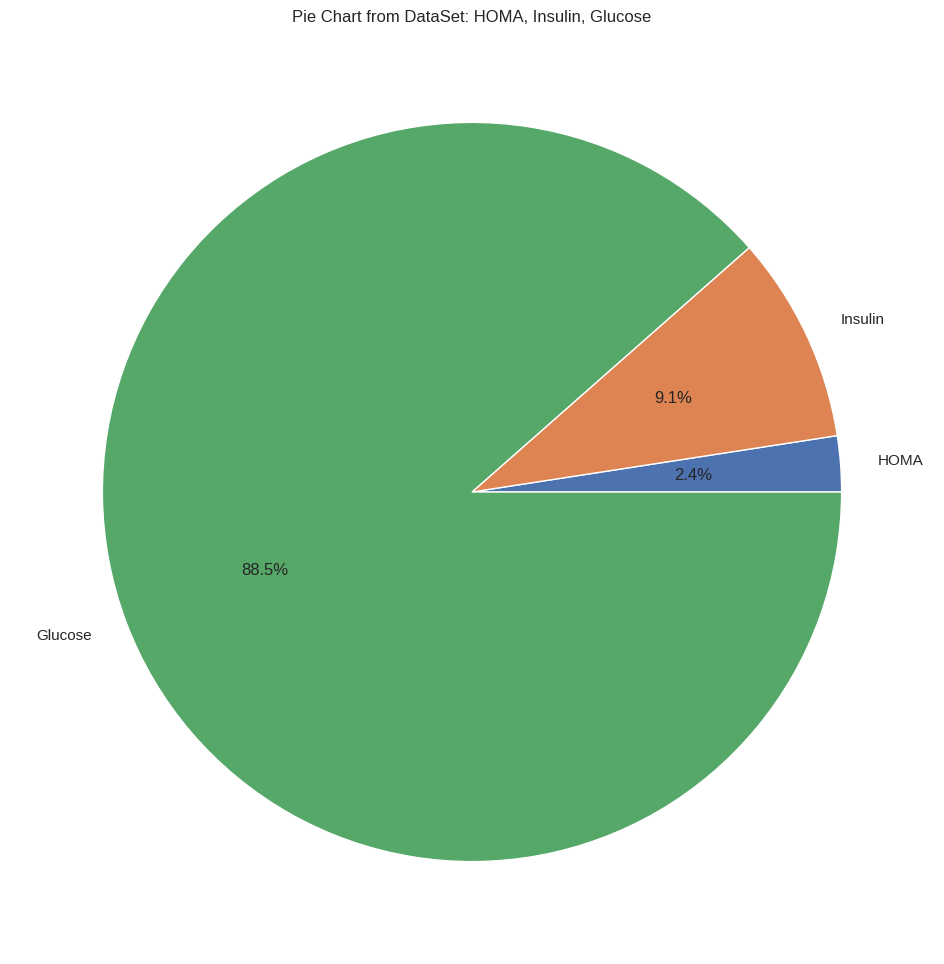

In [ ]:
data = df[["HOMA", "Insulin", "Glucose"]].values.tolist()

# combine the data into a single list
combined_data = [sum(x) for x in zip(*data)]

# create a pie chart
fig, ax = plt.subplots(figsize=(12, 12))
ax.pie(combined_data, labels=["HOMA", "Insulin", "Glucose"], autopct='%1.1f%%')
ax.set_title('Pie Chart from DataSet: HOMA, Insulin, Glucose')

# show the plot
plt.show()

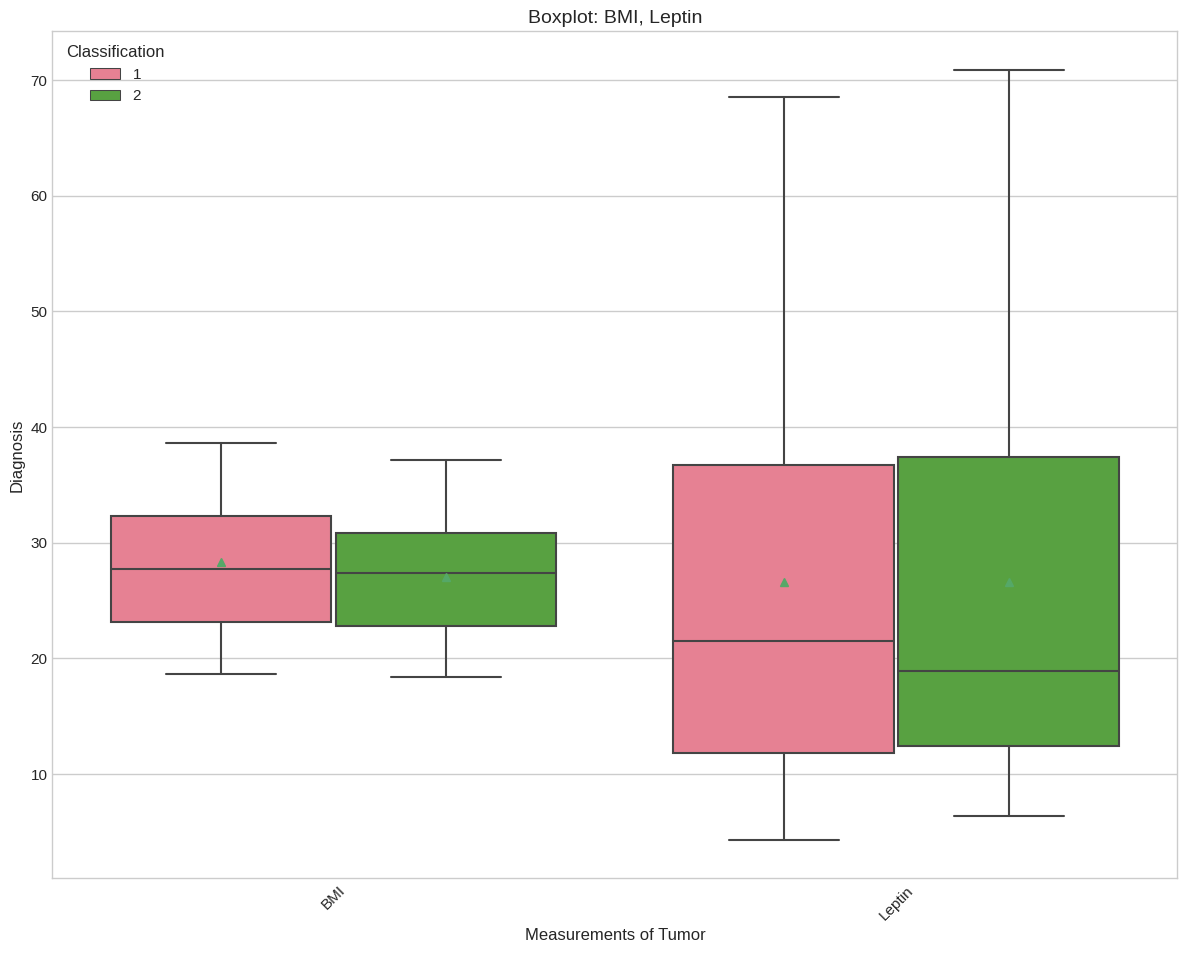

In [ ]:
plt.figure(figsize=(15, 11))
new_palette = sns.color_palette("husl", n_colors=3)
df_melted = pd.melt(df, id_vars=["Classification"], value_vars=["BMI", "Leptin"],
var_name="group_column", value_name="value_column")

# Create grouped boxplot with means
sns.boxplot(x="group_column", y="value_column", data=df_melted, hue="Classification", orient="v", palette=new_palette, showmeans=True, showfliers=False)

plt.xlabel("Measurements of Tumor", fontsize=12)
plt.ylabel("Diagnosis", fontsize=12)
plt.title("Boxplot: BMI, Leptin", fontsize=14)
plt.xticks(rotation=45)
plt.subplots_adjust(left=0.15)

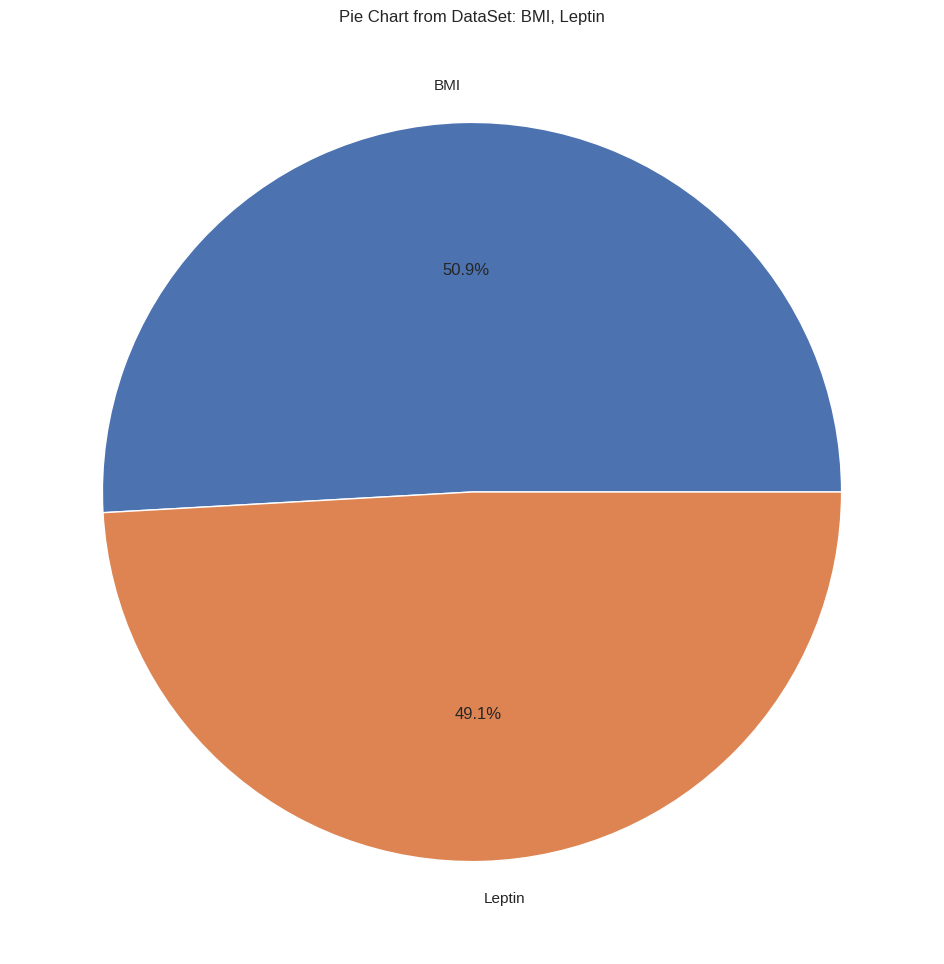

In [ ]:
data = df[["BMI", "Leptin"]].values.tolist()

# combine the data into a single list
combined_data = [sum(x) for x in zip(*data)]

# create a pie chart
fig, ax = plt.subplots(figsize=(12, 12))
ax.pie(combined_data, labels=["BMI", "Leptin"], autopct='%1.1f%%')
ax.set_title('Pie Chart from DataSet: BMI, Leptin')

# show the plot
plt.show()

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
!pip install sklearn
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
X = df.drop('Classification', axis=1)
y = df['Classification']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.7 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31644 sha256=20b17124a367415208274eaa5d30f4eb6ecb060c052c60a4e35b34f0da6a4b96
  Stored in directory: /root/.cache/pip/wheels/3a/94/d0/6cd83c8a80a4236fd4cb2a1fd846ecf72ab1e0ac238c5951c0
Successfully built libarchive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setu

In [ ]:
from sklearn import metrics
# Model Accuracy
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5128205128205128


In [ ]:
df2 = df.replace('M', '2' )
df3 = df2.replace('B', '1' )


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
X = df3.drop('Classification', axis=1)
y = df3['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)


selected_feat = rf.feature_importances_
print(selected_feat)

[0.10579507 0.10751939 0.30408907 0.08413224 0.07242647 0.06946084
 0.05728876 0.11042805 0.08886009]


In [ ]:
rf. score(X_test, y_test)


0.28392307692307694

<BarContainer object of 9 artists>

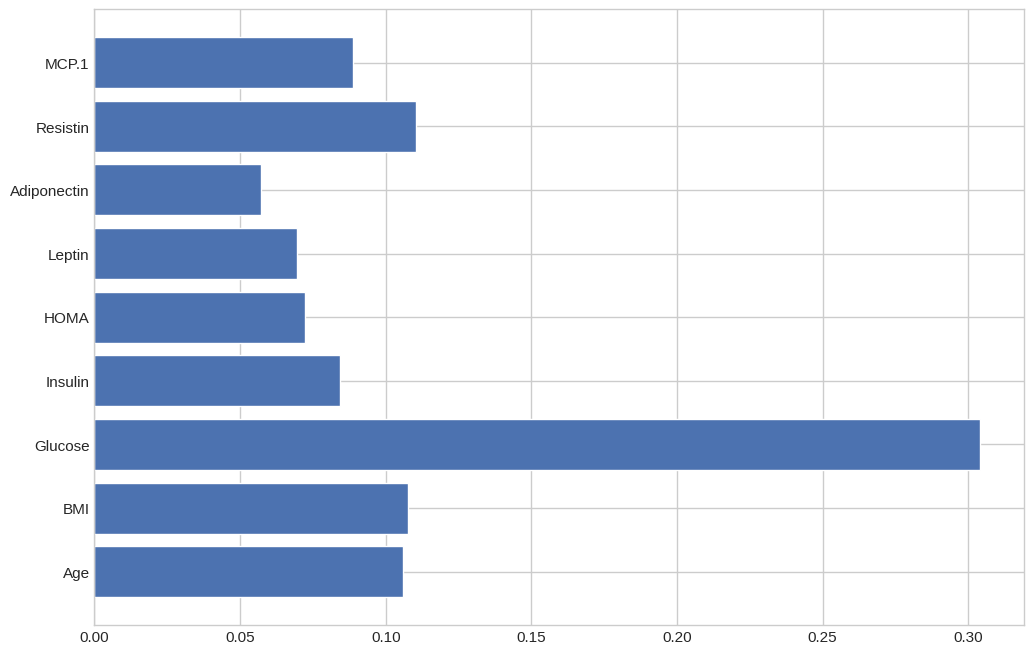

In [ ]:
names = df3.drop('Classification', axis=1)
plt.barh(names.columns, rf.feature_importances_)

0.349912209415874

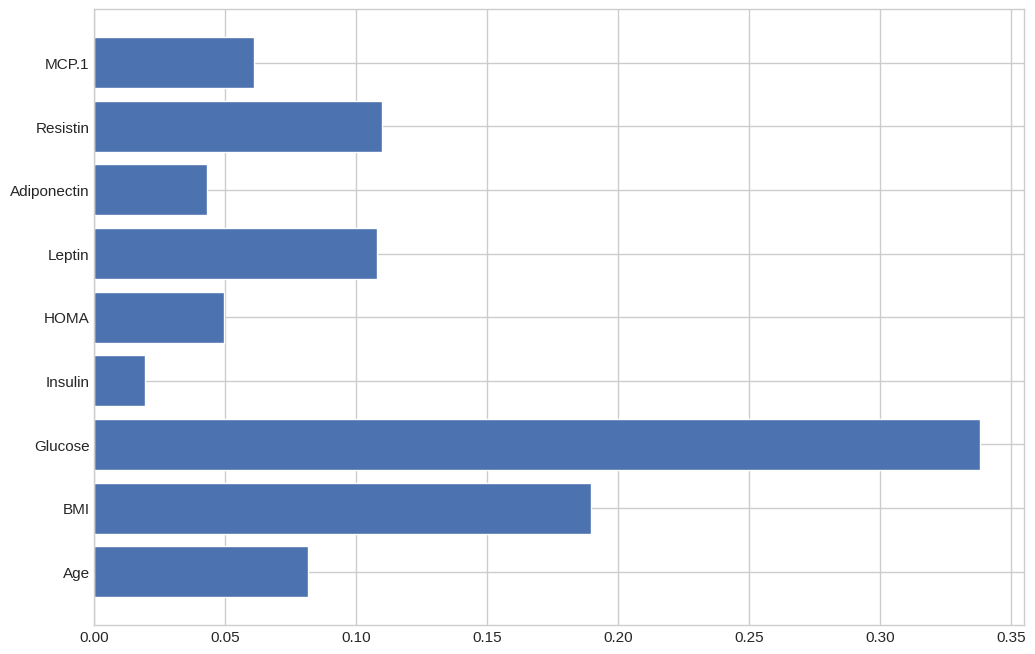

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor
X = df3.drop('Classification', axis=1)
y = df3['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)
xgb.feature_importances_
plt.barh(names.columns, xgb.feature_importances_)
xgb.score(X_test, y_test)